In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

### Data taken from the UCI Machine Learning Database and imported onto home computer

In [3]:
df = pd.read_csv("C:\\Users\\damps\\Documents\\Pima Indians.csv")

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,384.500000,221.846794,1.000,192.75000,384.5000,576.25000,768.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedFunc,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Visualise Correlations between variables and particularly with respect to Outcome. Glucose, BMI and Age are 3 most correlated with Diabetes Outcome 

In [5]:
df=df.drop(['Unnamed: 0'], axis=1)

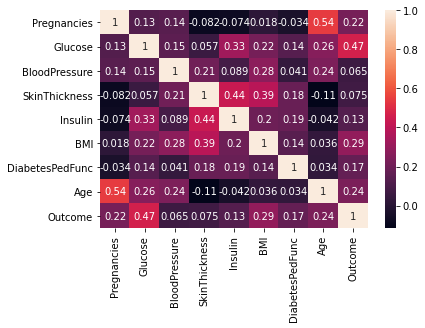

In [6]:
corr = df.corr()
pima_heatmap =sns.heatmap(corr, annot = True)
pima_heatmap
plt.savefig("heatmap.png");

# Investigating the DataFrame for missing values. 

In [7]:
df=df.dropna(axis=0, how='any')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedFunc,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


###### No rows contain any NA's as number of rows remains 768

## Investigating the DataFrame for null values (Pregnancies and Outcome will have values=0). All the others (except Insulin) would not be expected to contain 0 values so will be assumed to be missing values.

In [9]:
(df==0).sum(axis=0)

Pregnancies        111
Glucose              5
BloodPressure       35
SkinThickness      227
Insulin            374
BMI                 11
DiabetesPedFunc      0
Age                  0
Outcome            500
dtype: int64

### About half of all subjects don't have Insulin values  so column/variable dropped. It's possible that they do have 0 insulin value but then they would all be positive for diabetes and so this is not a possible explanation. Similarly approximately 30% (227/768) of Skin Thickness values are assumed missing as 0 and looking at the correlation with outcome (0.075), better to remove variable instead of dropping 227 samples to accommodate SkinThickness and use the median value for instance. 

In [9]:
df1=df.drop(['Insulin', 'SkinThickness'], axis=1)

In [10]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,384.500000,221.846794,1.000,192.75000,384.5000,576.25000,768.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Now exclude subjects that contain 0 values in other variables

In [11]:
df1 = df1.loc[~((df1['Glucose'] == 0) | (df1['BloodPressure'] == 0) | 
                (df1['BMI'] == 0)),:]

### Now that null values have been removed Checking that the dataframe doesn't contain any other unusual values e.g min Age =1 or  Glucose = 10. Also comparing mean of Outcome before and after to ensure that little or no change in Outcome value (0.348 before; 0.344 after)  

In [12]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,724.0,385.781768,222.504870,1.000,192.750,386.500,578.2500,768.00
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


In [13]:
df1=df1.dropna(axis=0, how='any')
clean_df1=df1.copy()
y=clean_df1['Outcome'].copy()
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 724, dtype: int64

In [14]:
variables = ['Pregnancies', 'Glucose', 'BloodPressure',  'BMI', 
             'DiabetesPedigreeFunction', 'Age']
X = clean_df1[variables].copy()
X

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,33.6,0.627,50
1,1,85,66,26.6,0.351,31
2,8,183,64,23.3,0.672,32
3,1,89,66,28.1,0.167,21
4,0,137,40,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63
764,2,122,70,36.8,0.340,27
765,5,121,72,26.2,0.245,30
766,1,126,60,30.1,0.349,47


### Using ensemble method (combining logistic regression, k-Nearest Neighbour and Decision Tree) to potentially get a better predictive model than using each one by itself

In [157]:
SEED = 1001
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,
                                                    random_state= SEED)

lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
classifiers = [('Logistic Regression', lr),('K Nearest Neighbours', knn),
               ('Classification Tree', dt)]

In [156]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.759
K Nearest Neighbours : 0.800
Classification Tree : 0.752


C:\Users\damps\Anaconda3\Anaconda3a\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [134]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.821


C:\Users\damps\Anaconda3\Anaconda3a\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
y_train.describe().transpose()

count    543.000000
mean       0.357274
std        0.479638
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [66]:
diabetes_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=1001)

### Using Cross-Validation to try and minimise over-fitting where Training Mean Squared Error (MSE) is significantly lower than test MSE. CV =4 meaning that split into 4 groups and each time training takes place on 75% and test is 25%

In [135]:
MSE_CV = - cross_val_score(vc, X_train, y_train, cv= 4,
scoring='neg_mean_squared_error',n_jobs = -1)

In [136]:
vc.fit(X_train, y_train)

C:\Users\damps\Anaconda3\Anaconda3a\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1001,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('K Nearest Neighbours',
                              KNeighborsClassifier(algorithm='auto',
                                                   lea...
                             ('Classification Tree',
                              DecisionTr

In [137]:
y_predict_train = vc.predict(X_train)

In [138]:
y_predict_test = vc.predict(X_test)

### Determining the mean square error and ensuring that Train and Test MSE are similar.If test MSE is much larger than train MSE then this suggests that there is overfitting.

In [139]:
print('CV : MSE {:.2f}'.format(MSE_CV.mean()))

CV : MSE 0.25


In [140]:
print('Train MSE {:.2f}'.format(MSE(y_train, y_predict_train)))

Train MSE 0.13


In [141]:
print('Test MSE {:.2f}'.format(MSE(y_test, y_predict_test)))

Test MSE 0.18


In [142]:
predictions = vc.predict(X_test)

In [143]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.8206896551724138

Confusion Matrix is      True Neg   False Pos
                        False Neg    True Pos

In [144]:
cm = confusion_matrix(y_true = y_test, y_pred = predictions)
cm

array([[80,  8],
       [18, 39]], dtype=int64)

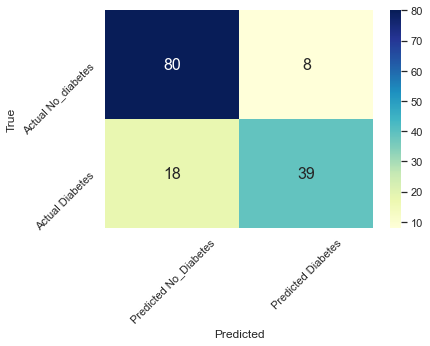

In [112]:
array=[[80,  8],
       [ 18,  39]]
df_cm = pd.DataFrame(array,columns=["Predicted No_Diabetes", " Predicted Diabetes"],
                     index=["Actual No_diabetes", "Actual Diabetes"])
sns.set(font_scale=1) 
sns.heatmap(df_cm, annot=True,cmap="YlGnBu", fmt=".0f",annot_kws={"size": 16})
plt.savefig("CM2.png")
plt.xlabel('Predicted')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel('True')
plt.ioff()
plt.show();

In [113]:
cr=classification_report(y_true = y_test, y_pred = predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        88
           1       0.83      0.68      0.75        57

    accuracy                           0.82       145
   macro avg       0.82      0.80      0.81       145
weighted avg       0.82      0.82      0.82       145



### Precision is proportion of those identified as negative that were actually negative (112/(112+22)) = 0.84, Likewise for positives (33/(33+14)) = 0.70 Recall is proportion of those that were negative that were correctly identified as negative (112/(112+14)) = 0.89. For positive, (33/(33+22)) = 0.60